# Ellbow-Kriterium bei unterschiedlichen Verteilungen

In [1]:
import numpy as np

sigmafaktor = 1.0
x = np.random.normal(15, 1*sigmafaktor, 1000)
y = np.random.normal(15, 1.5*sigmafaktor, 1000)

x = np.append(x, np.random.normal(10, 1*sigmafaktor, 1000))
y = np.append(y, np.random.normal(10, 1*sigmafaktor, 1000))

x = np.append(x, np.random.normal(15, 0.5*sigmafaktor, 1000))
y = np.append(y, np.random.normal(8, 1*sigmafaktor, 1000))

x = np.append(x, np.random.normal(13, 0.4*sigmafaktor, 1000))
y = np.append(y, np.random.normal(10, 0.4*sigmafaktor, 1000))

x = np.append(x, np.random.normal(5, 0.5*sigmafaktor, 1000))
y = np.append(y, np.random.normal(5, 0.5*sigmafaktor, 1000))



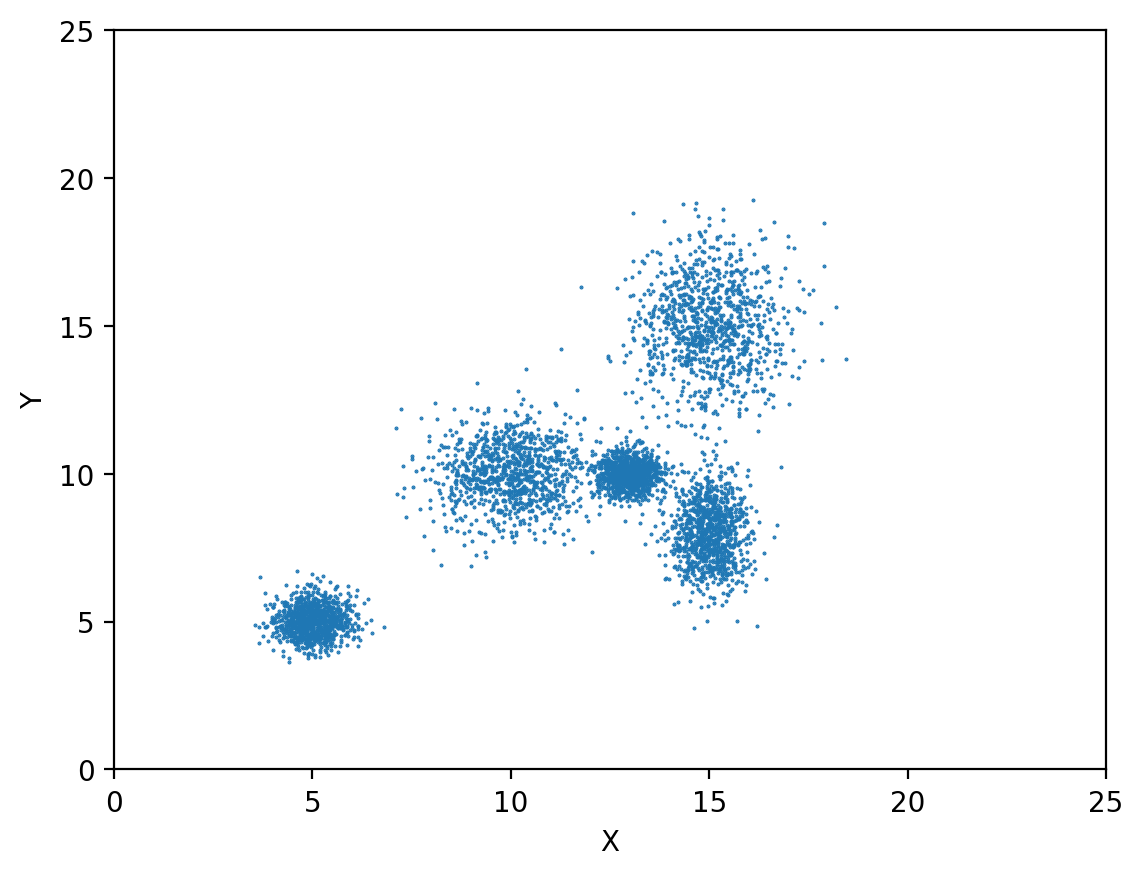

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats = set(["retina"])
plt.scatter(x, y, s=0.2)
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [7]:
import pandas as pd
d = {'x': x, 'y': y}
data = pd.DataFrame(data=d)
data

,x,y
0,15.268068,15.374527
1,14.328779,14.998067
2,14.458498,14.567614
3,15.093231,15.947858
4,15.860310,12.622675
...,...,...
4995,4.711005,5.301269
4996,4.674425,5.397191
4997,4.702054,5.330018
4998,4.475818,5.152644


C:\Users\michi\OneDrive\MSC DV\Python\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\michi\OneDrive\MSC DV\Python\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\michi\OneDrive\MSC DV\Python\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\michi\OneDrive\MSC DV\Python\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
 

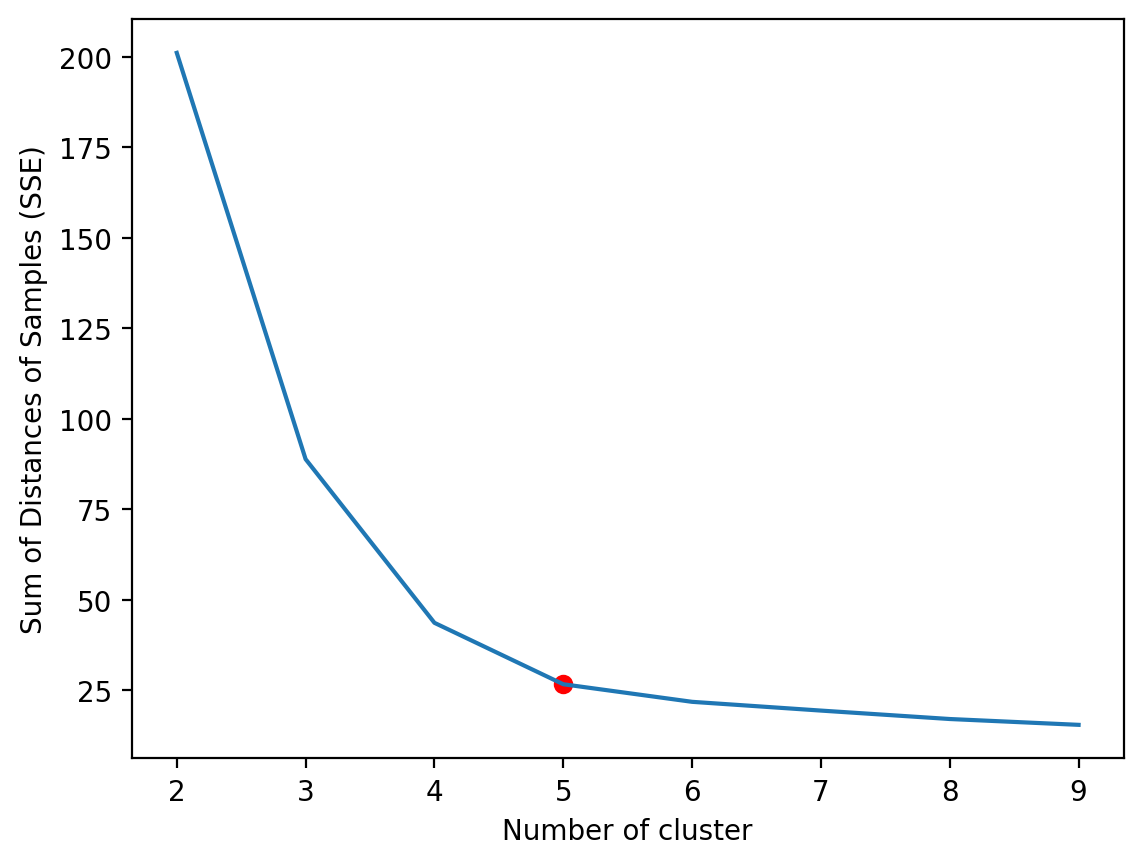

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = {}
sil_coeff = {}
verbesserung = []
verbesserung.append(1)
for k in range(2, 10):  # Wir probieren alle Clustergrößen von 1 bis 10 aus....
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    sse[k] = kmeans.inertia_ / 250 # Inertia: Sum of distances of samples to their closest cluster center
   
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Sum of Distances of Samples (SSE)")

# Wo ist der Ellenbogen? - Dort wo die Änderung am dichtesten bei 50% Änderung ist
plt.scatter(5, sse[5], color='red')

plt.show()

In [5]:
sse

{2: 201.1395661272085,
 3: 88.86973243549609,
 4: 43.64114826921877,
 5: 26.6665132983127,
 6: 21.807545957499332,
 7: 19.384336888151413,
 8: 17.062016338395807,
 9: 15.449369837067483}

In [6]:
for s in sse.values():
    print(s / sse[2])

1.0
0.4418311829274376
0.21696948596189378
0.13257716426338395
0.10841997115429487
0.09637256985973612
0.08482675321873333
0.07680920335334074
